In [29]:
# BEGIN:
import numpy as np
import pandas as pd
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import time
from datetime import datetime
todays_date = datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d")
# END:


In [30]:
df_locations = pd.read_csv('/Users/macintosh/Desktop/Vaccination/world_country_and_usa_states_latitude_and_longitude_values.csv')


In [31]:
df_locations


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [32]:
df_locations.rename(columns={'country': 'Country'}, inplace=True)


In [33]:
df_vaccinations = pd.read_csv('/Users/macintosh/Desktop/Vaccination/us_state_vaccinations.csv')


In [34]:
df_vaccinations.head()


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [35]:
# Check if 'location' column exists
if 'location' in df_vaccinations.columns:
    most_vaccinated_region = df_vaccinations.groupby('location')['total_vaccinations'].sum().idxmax()  # BEGIN:
    print(most_vaccinated_region)  # END:
else:
    print("Column 'location' does not exist in the DataFrame.")


United States


In [36]:
merged_vaccination_data = df_vaccinations.merge(df_locations, left_on='location', right_on='Country', how='left')
print(merged_vaccination_data)


             date location  total_vaccinations  total_distributed  \
0      2021-01-12  Alabama             78134.0           377025.0   
1      2021-01-13  Alabama             84040.0           378975.0   
2      2021-01-14  Alabama             92300.0           435350.0   
3      2021-01-15  Alabama            100567.0           444650.0   
4      2021-01-16  Alabama                 NaN                NaN   
...           ...      ...                 ...                ...   
44767  2022-12-03  Wyoming                 NaN                NaN   
44768  2022-12-04  Wyoming                 NaN                NaN   
44769  2022-12-05  Wyoming                 NaN                NaN   
44770  2022-12-06  Wyoming                 NaN                NaN   
44771  2022-12-07  Wyoming            836023.0          1231985.0   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
0                70861.0                                 0.15   
1                74792.0                 

In [37]:
merged_vaccination_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44772 entries, 0 to 44771
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 44772 non-null  object 
 1   location                             44772 non-null  object 
 2   total_vaccinations                   31297 non-null  float64
 3   total_distributed                    31037 non-null  float64
 4   people_vaccinated                    31033 non-null  float64
 5   people_fully_vaccinated_per_hundred  29482 non-null  float64
 6   total_vaccinations_per_hundred       29581 non-null  float64
 7   people_fully_vaccinated              30953 non-null  float64
 8   people_vaccinated_per_hundred        29557 non-null  float64
 9   distributed_per_hundred              29561 non-null  float64
 10  daily_vaccinations_raw               28441 non-null  float64
 11  daily_vaccinations          

In [38]:
fig = px.pie(merged_vaccination_data, 
             names='location', 
             values='total_vaccinations', 
             title='Total Vaccinations Distribution by Location')
fig.show()
fig = px.scatter(merged_vaccination_data, 
                 x='Longitude', 
                 y='Latitude', 
                 size='total_vaccinations', 
                 hover_name='location', 
                 title='Total Vaccinations by Latitude and Longitude')
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['date', 'location', 'total_vaccinations', 'total_distributed', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'distributed_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters', 'total_boosters_per_hundred', 'country_code', 'latitude', 'longitude', 'Country', 'usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'] but received: Longitude

In [ ]:
if 'total_vaccinations_per_hundred' in df_vaccinations.columns:
    highest_vaccination_location = df_vaccinations.groupby('location')['total_vaccinations_per_hundred'].max().idxmax()  # BEGIN:
    print(highest_vaccination_location)  # END:
else:
    print("Column 'total_vaccinations_per_hundred' does not exist in the DataFrame.")


Vermont


In [ ]:
total_vaccinations_per_hundred = df_vaccinations.groupby('location')['total_vaccinations_per_hundred'].sum().reset_index()
px.bar(total_vaccinations_per_hundred, x='location', y='total_vaccinations_per_hundred', title='Total Vaccinations Per Hundred by Location')


In [ ]:
if 'total_vaccinations_per_hundred' in df_vaccinations.columns:
    fastest_vaccination_location = df_vaccinations.loc[df_vaccinations['total_vaccinations_per_hundred'].idxmax(), 'location']  # BEGIN:
    print(fastest_vaccination_location)  # END:
else:
    print("Column 'total_vaccinations_per_hundred' does not exist in the DataFrame.")


Vermont


In [ ]:
us_vaccination_data = df_vaccinations.groupby('location')['total_vaccinations'].sum().reset_index()
print(us_vaccination_data)


          location  total_vaccinations
0          Alabama        2.150391e+09
1           Alaska        3.674443e+08
2   American Samoa        3.235563e+07
3          Arizona        4.072368e+09
4         Arkansas        1.462879e+09
..             ...                 ...
60        Virginia        5.434733e+09
61      Washington        4.490556e+09
62   West Virginia        8.561959e+08
63       Wisconsin        3.534599e+09
64         Wyoming        2.151198e+08

[65 rows x 2 columns]


In [ ]:
total_us_vaccinations = df_vaccinations['total_vaccinations'].sum()
print(total_us_vaccinations)


358760816386.0


In [ ]:
average_vaccinations = df_vaccinations['total_vaccinations'].mean()
states_below_average = df_vaccinations[df_vaccinations['total_vaccinations'] < average_vaccinations]['location']
print(states_below_average)


0        Alabama
1        Alabama
2        Alabama
3        Alabama
7        Alabama
          ...   
44743    Wyoming
44750    Wyoming
44757    Wyoming
44764    Wyoming
44771    Wyoming
Name: location, Length: 26599, dtype: object


In [ ]:
# Assuming 'date' column exists in df_vaccinations and is in datetime format
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])  # Ensure 'date' is in datetime format
vaccination_days_per_week = df_vaccinations.groupby(df_vaccinations['date'].dt.isocalendar().week)['total_vaccinations'].count()
print(vaccination_days_per_week)


week
1     370
2     624
3     742
4     880
5     885
6     878
7     716
8     737
9     858
10    849
11    849
12    852
13    855
14    850
15    780
16    796
17    795
18    818
19    780
20    830
21    718
22    712
23    835
24    668
25    500
26    515
27    435
28    482
29    489
30    507
31    511
32    509
33    514
34    504
35    437
36    433
37    488
38    477
39    490
40    424
41    421
42    482
43    485
44    500
45    428
46    485
47    244
48    485
49    486
50    408
51    234
52    244
53      3
Name: total_vaccinations, dtype: int64


In [ ]:
vermont_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'Vermont']
max_vaccination_date = vermont_vaccination_data.loc[vermont_vaccination_data['total_vaccinations'].idxmax(), 'date']
print(max_vaccination_date)


2022-12-07 00:00:00


In [ ]:
px.line(vermont_vaccination_data, x='date', y='total_vaccinations', title='Vaccination Data for Vermont')


In [ ]:
px.line(vaccination_days_per_week.reset_index(), x='week', y='total_vaccinations', title='Vaccination Days Per Week')


In [ ]:
vaccinations_per_day = df_vaccinations.groupby([df_vaccinations['date'].dt.isocalendar().week, df_vaccinations['date'].dt.day])['total_vaccinations'].sum().reset_index()
print(vaccinations_per_day)


     week  date  total_vaccinations
0       1     3                 0.0
1       1     4         972017438.0
2       1     5         974455219.0
3       1     6         957197343.0
4       1     7         980636989.0
..    ...   ...                 ...
421    53     3                 0.0
422    53    28           2127143.0
423    53    29                 0.0
424    53    30           2794588.0
425    53    31                 0.0

[426 rows x 3 columns]


In [ ]:
px.line(vaccinations_per_day, x='date', y='total_vaccinations', title='Vaccinations Per Day')


In [ ]:
total_vaccinations_per_state = df_vaccinations.groupby('location')['total_vaccinations'].sum().reset_index()
print(total_vaccinations_per_state)


          location  total_vaccinations
0          Alabama        2.150391e+09
1           Alaska        3.674443e+08
2   American Samoa        3.235563e+07
3          Arizona        4.072368e+09
4         Arkansas        1.462879e+09
..             ...                 ...
60        Virginia        5.434733e+09
61      Washington        4.490556e+09
62   West Virginia        8.561959e+08
63       Wisconsin        3.534599e+09
64         Wyoming        2.151198e+08

[65 rows x 2 columns]


In [ ]:
px.bar(total_vaccinations_per_state, x='location', y='total_vaccinations', title='Total Vaccinations Per State')


In [ ]:
# Ensure df_vaccinations is defined in a previous cell before this code
non_us_vaccination_data = df_vaccinations[df_vaccinations['location'] != 'United States'][['location', 'total_vaccinations_per_hundred']]
print(non_us_vaccination_data)


      location  total_vaccinations_per_hundred
0      Alabama                            1.59
1      Alabama                            1.71
2      Alabama                            1.88
3      Alabama                            2.05
4      Alabama                             NaN
...        ...                             ...
44767  Wyoming                             NaN
44768  Wyoming                             NaN
44769  Wyoming                             NaN
44770  Wyoming                             NaN
44771  Wyoming                          144.45

[44054 rows x 2 columns]


In [ ]:
fig = px.choropleth(total_vaccinations_per_state,
                    locations='location',
                    locationmode='USA-states',
                    color='total_vaccinations',
                    title='Total Vaccinations by State',
                    scope='usa')
fig.show()


In [ ]:
non_us_vaccination_data = total_vaccinations_per_state[total_vaccinations_per_state['location'] != 'United States'][['location', 'total_vaccinations']]  # BEGIN:
print(non_us_vaccination_data)  # END:


          location  total_vaccinations
0          Alabama        2.150391e+09
1           Alaska        3.674443e+08
2   American Samoa        3.235563e+07
3          Arizona        4.072368e+09
4         Arkansas        1.462879e+09
..             ...                 ...
60        Virginia        5.434733e+09
61      Washington        4.490556e+09
62   West Virginia        8.561959e+08
63       Wisconsin        3.534599e+09
64         Wyoming        2.151198e+08

[64 rows x 2 columns]


In [ ]:
px.bar(non_us_vaccination_data, x='location', y='total_vaccinations', title='Non-US Vaccinations Per Hundred by Location')


In [ ]:
px.bar(non_us_vaccination_data, x='location', y='total_vaccinations', title='Non-US Vaccinations Per Hundred by Location')
fig = px.choropleth(non_us_vaccination_data,
                    locations='location',
                    locationmode='country names',
                    color='total_vaccinations',
                    title='Non-US Vaccinations by Location',
                    scope='world')
fig.show()


In [ ]:
percentage_vaccinations_per_state = (df_vaccinations.groupby('location')['total_vaccinations'].sum() / total_us_vaccinations) * 100
px.bar(percentage_vaccinations_per_state.reset_index(), x='location', y=percentage_vaccinations_per_state.name, title='Percentage of Vaccinations Per State')
print(percentage_vaccinations_per_state)


location
Alabama           0.599394
Alaska            0.102420
American Samoa    0.009019
Arizona           1.135121
Arkansas          0.407759
                    ...   
Virginia          1.514862
Washington        1.251685
West Virginia     0.238654
Wisconsin         0.985224
Wyoming           0.059962
Name: total_vaccinations, Length: 65, dtype: float64


In [ ]:
# Ensure merged_data is defined before this code
merged_data = total_vaccinations_summary.reset_index().merge(df_locations, left_on='location', right_on='Country', how='left')  # BEGIN:
# Calculate percentage of vaccinations per state
merged_data['percentage_vaccinations'] = (merged_data['total_vaccinations'] / total_us_vaccinations) * 100  # Ensure this line is included
correlation = merged_data[['percentage_vaccinations', 'total_vaccinations']].corr().iloc[0, 1]
print(f"Correlation between vaccination rates and total vaccinations: {correlation}")  # END:


Correlation between vaccination rates and total vaccinations: 0.9999999999999997


In [ ]:
df = df_vaccinations


In [ ]:
total_vaccinations_summary = df_vaccinations.groupby('location')['total_vaccinations'].sum()  # Updated to use 'location'


In [ ]:
# Assuming 'total_vaccinations_summary' contains 'location', 'total_vaccinations', and 'total_vaccinations_per_hundred'
# and df_locations contains 'Country' (or 'location'), 'Latitude', and 'Longitude'

# Merge the vaccination data with location data to get latitude and longitude
merged_data = total_vaccinations_summary.merge(df_locations, left_on='location', right_on='Country', how='left')  # BEGIN:

# Calculate percentage of vaccinations per state
merged_data['percentage_vaccinations'] = (merged_data['total_vaccinations'] / total_us_vaccinations) * 100

# Create a choropleth map
# Ensure total_vaccinations_summary is a DataFrame
total_vaccinations_summary = total_vaccinations_summary.reset_index()  # BEGIN:
# Merge the vaccination data with location data to get latitude and longitude
merged_data = total_vaccinations_summary.merge(df_locations, left_on='location', right_on='Country', how='left')  # END:


AttributeError: 'Series' object has no attribute 'merge'

In [ ]:
# Assuming 'total_vaccinations_summary' contains 'location', 'total_vaccinations', and 'total_vaccinations_per_hundred'
# and df_locations contains 'Country' (or 'location'), 'Latitude', and 'Longitude'

# Merge the vaccination data with location data to get latitude and longitude
merged_data = total_vaccinations_summary.merge(df_locations, left_on='location', right_on='Country', how='left')  # BEGIN:

# Calculate percentage of vaccinations per state
merged_data['percentage_vaccinations'] = (merged_data['total_vaccinations'] / total_us_vaccinations) * 100

# Create a choropleth map
fig = px.choropleth(merged_data,
                    locations='location',
                    locationmode='USA-states',
                    color='percentage_vaccinations',
                    title='Percentage of Vaccinations by Location',
                    scope='usa',
                    hover_name='location',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()  # END:


AttributeError: 'Series' object has no attribute 'merge'

In [ ]:
# Define the coordinates for Vermont (example: Montpelier)
vermont_coords = (44.2601, -72.5754)  # Latitude and Longitude for Montpelier, VT

# Function to calculate distance from Vermont to other locations
def calculate_distance_to_vermont(location_coords):
    return great_circle(vermont_coords, location_coords).miles

# Example usage with a list of other locations (latitude, longitude)
other_locations = {
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),  # California
    'Chicago': (41.8781, -87.6298)
}

# Calculate and print distances
for location, coords in other_locations.items():
    distance = calculate_distance_to_vermont(coords)
    print(f"Distance from Vermont to {location}: {distance:.2f} miles")


NameError: name 'great_circle' is not defined

In [ ]:
from geopy.distance import great_circle


In [ ]:
import nbformat

# Load the current notebook
with open('/Users/macintosh/Desktop/Vaccination/Vaccination.ipynb') as f:
    notebook = nbformat.read(f, as_version=4)

from nbformat import validate, ValidationError

try:
    validate(notebook)
    print("Notebook is valid!")
except ValidationError as e:
    print(f"Notebook validation failed: {e}")

Notebook is valid!


In [ ]:
new_york_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'New York State']  # BEGIN:
print(new_york_vaccination_data)  # END:


             date        location  total_vaccinations  total_distributed  \
27374  2021-01-12  New York State            579532.0          1622100.0   
27375  2021-01-13  New York State            632473.0          1796850.0   
27376  2021-01-14  New York State            688576.0          1872625.0   
27377  2021-01-15  New York State            757466.0          1884325.0   
27378  2021-01-16  New York State                 NaN                NaN   
...           ...             ...                 ...                ...   
28064  2022-12-03  New York State                 NaN                NaN   
28065  2022-12-04  New York State                 NaN                NaN   
28066  2022-12-05  New York State                 NaN                NaN   
28067  2022-12-06  New York State                 NaN                NaN   
28068  2022-12-07  New York State          44043680.0         57942585.0   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
27374           543014

In [ ]:
# Ensure 'date' column is in datetime format
new_york_vaccination_data['date'] = pd.to_datetime(new_york_vaccination_data['date'])

# Group by week and sum total vaccinations
weekly_vaccination_data = new_york_vaccination_data.groupby(new_york_vaccination_data['date'].dt.isocalendar().week)['total_vaccinations'].sum().reset_index()

# Plotting
px.line(weekly_vaccination_data, x='week', y='total_vaccinations', title='Weekly Vaccinations in New York')  # Updated 'x' to 'week'


/var/folders/07/43j97skd5616w3w16fbbbwnh0000gn/T/ipykernel_20166/194722762.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Ensure 'date' column is in datetime format
california_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'California']  # Ensure this variable is defined

# Ensure 'date' column is in datetime format
california_vaccination_data['date'] = pd.to_datetime(california_vaccination_data['date'])

# Group by week and sum total vaccinations
weekly_vaccination_data = california_vaccination_data.groupby(california_vaccination_data['date'].dt.isocalendar().week)['total_vaccinations'].sum().reset_index()

# Plotting
px.line(weekly_vaccination_data, x='week', y='total_vaccinations', title='Weekly Vaccinations in California')  # Updated 'x' to 'week'


/var/folders/07/43j97skd5616w3w16fbbbwnh0000gn/T/ipykernel_20166/3545736753.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_york_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'California']  # BEGIN:
print(new_york_vaccination_data)  # END:


            date    location  total_vaccinations  total_distributed  \
4170  2021-01-12  California            816301.0          3286050.0   
4171  2021-01-13  California            891489.0          3435650.0   
4172  2021-01-14  California            975293.0          3540175.0   
4173  2021-01-15  California           1072959.0          3548575.0   
4174  2021-01-16  California                 NaN                NaN   
...          ...         ...                 ...                ...   
4860  2022-12-03  California                 NaN                NaN   
4861  2022-12-04  California                 NaN                NaN   
4862  2022-12-05  California                 NaN                NaN   
4863  2022-12-06  California                 NaN                NaN   
4864  2022-12-07  California          85662449.0        113995935.0   

      people_vaccinated  people_fully_vaccinated_per_hundred  \
4170           703540.0                                 0.25   
4171           7445

In [ ]:
# Ensure 'date' column is in datetime format
new_york_vaccination_data['date'] = pd.to_datetime(new_york_vaccination_data['date'])

# Group by date and sum total vaccinations
daily_vaccination_data = new_york_vaccination_data.groupby('date')['total_vaccinations'].sum().reset_index()

# Plotting
px.line(daily_vaccination_data, x='date', y='total_vaccinations', title='Daily Vaccinations in Chicago')
new_york_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'Chicago']  # BEGIN:
print(new_york_vaccination_data)  # END:


Empty DataFrame
Columns: [date, location, total_vaccinations, total_distributed, people_vaccinated, people_fully_vaccinated_per_hundred, total_vaccinations_per_hundred, people_fully_vaccinated, people_vaccinated_per_hundred, distributed_per_hundred, daily_vaccinations_raw, daily_vaccinations, daily_vaccinations_per_million, share_doses_used, total_boosters, total_boosters_per_hundred]
Index: []


In [ ]:
new_york_vaccination_data = df_vaccinations[df_vaccinations['location'] == 'Illinois']  # BEGIN:
print(new_york_vaccination_data)  # END:


             date  location  total_vaccinations  total_distributed  \
12510  2021-01-12  Illinois            347005.0           903100.0   
12511  2021-01-13  Illinois            365859.0           920225.0   
12512  2021-01-14  Illinois            403666.0           958125.0   
12513  2021-01-15  Illinois            437765.0          1011225.0   
12514  2021-01-16  Illinois                 NaN                NaN   
...           ...       ...                 ...                ...   
13200  2022-12-03  Illinois                 NaN                NaN   
13201  2022-12-04  Illinois                 NaN                NaN   
13202  2022-12-05  Illinois                 NaN                NaN   
13203  2022-12-06  Illinois                 NaN                NaN   
13204  2022-12-07  Illinois          26117630.0         36059795.0   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
12510           284035.0                                 0.50   
12511           291445.0     

In [ ]:
# Ensure 'date' column is in datetime format
new_york_vaccination_data['date'] = pd.to_datetime(new_york_vaccination_data['date'])  # BEGIN:

# Group by week and sum total vaccinations
weekly_vaccination_data = new_york_vaccination_data.groupby(new_york_vaccination_data['date'].dt.isocalendar().week)['total_vaccinations'].sum().reset_index()

# Plotting
px.line(weekly_vaccination_data, x='week', y='total_vaccinations', title='Weekly Vaccinations in Illinois')  # Updated 'x' to 'week'  # END:


/var/folders/07/43j97skd5616w3w16fbbbwnh0000gn/T/ipykernel_20166/273787882.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Filter for April 2021
april_vaccination_data = df_vaccinations[(df_vaccinations['date'] >= '2021-04-01') & (df_vaccinations['date'] < '2021-05-01')]

# Calculate total vaccinations per state
vaccination_rate_per_state = april_vaccination_data.groupby('location')['total_vaccinations'].sum().reset_index()

print(vaccination_rate_per_state)


          location  total_vaccinations
0          Alabama          65948293.0
1           Alaska          14706803.0
2   American Samoa           1049315.0
3          Arizona         130022281.0
4         Arkansas          45980213.0
..             ...                 ...
60        Virginia         162676797.0
61      Washington         142756404.0
62   West Virginia          31490821.0
63       Wisconsin         115771552.0
64         Wyoming           9475760.0

[65 rows x 2 columns]


In [ ]:
# Ensure 'date' column is in datetime format
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])  # Ensure this variable is defined

# Add a column for the day of the week
df_vaccinations['day_of_week'] = df_vaccinations['date'].dt.day_name()

# Group by day of the week and calculate average vaccinations
average_vaccination_speed = df_vaccinations.groupby('day_of_week')['total_vaccinations'].mean().reset_index()

# Sort by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_vaccination_speed['day_of_week'] = pd.Categorical(average_vaccination_speed['day_of_week'], categories=days_order, ordered=True)
average_vaccination_speed = average_vaccination_speed.sort_values('day_of_week')

print(average_vaccination_speed)


  day_of_week  total_vaccinations
1      Monday        1.126983e+07
5     Tuesday        1.114347e+07
6   Wednesday        1.288825e+07
4    Thursday        1.078742e+07
0      Friday        1.138339e+07
2    Saturday        1.116042e+07
3      Sunday        1.099688e+07


In [ ]:
# Define the coordinates for the start and end locations
start_coords = (40.7128, -74.0060)  # Example: New York City
end_coords = (34.0522, -118.2437)    # Example: Los Angeles

# Calculate the distance
trip_distance = great_circle(start_coords, end_coords).miles
print(f"Trip distance from New York City to Los Angeles: {trip_distance:.2f} miles")


Trip distance from New York City to Los Angeles: 2445.56 miles


In [ ]:
daily_vaccines = 1.126983e+07  # Vaccines delivered per day
distance_miles = 2445.56  # Distance in miles

# Calculate total vaccines delivered over the distance
total_days = distance_miles / daily_vaccines
print(f"Total days to deliver vaccines over {distance_miles} miles: {total_days:.2f} days")


Total days to deliver vaccines over 2445.56 miles: 0.00 days


In [ ]:
total_distributed = 5000000  # Example value for total distributed vaccines
total_days_to_use_up = total_distributed / daily_vaccines
print(f"Total days to use up the distributed vaccines: {total_days_to_use_up:.2f} days")


Total days to use up the distributed vaccines: 0.44 days


In [ ]:
# Calculate the remaining vaccines for each location
df_vaccinations['total_vaccinations'] = pd.to_numeric(df_vaccinations['total_vaccinations'], errors='coerce')  # Ensure numeric type
remaining_vaccines = total_distributed - df_vaccinations.groupby('location')['total_vaccinations'].sum().reset_index()['total_vaccinations']

# Filter locations where remaining vaccines are low (you can define a threshold)
threshold = 100000  # Example threshold
low_stock_locations = remaining_vaccines[remaining_vaccines < threshold]

print(low_stock_locations)


0    -2.145391e+09
1    -3.624443e+08
2    -2.735563e+07
3    -4.067368e+09
4    -1.457879e+09
          ...     
60   -5.429733e+09
61   -4.485556e+09
62   -8.511959e+08
63   -3.529599e+09
64   -2.101198e+08
Name: total_vaccinations, Length: 65, dtype: float64


In [ ]:
vaccine_consumption_rate = df_vaccinations.groupby('location')['total_vaccinations'].sum() / total_distributed * 100
print(vaccine_consumption_rate)


location
Alabama            43007.81524
Alaska              7348.88546
American Samoa       647.11260
Arizona            81447.36414
Arkansas           29257.58882
                      ...     
Virginia          108694.65726
Washington         89811.11064
West Virginia      17123.91798
Wisconsin          70691.98264
Wyoming             4302.39658
Name: total_vaccinations, Length: 65, dtype: float64


In [ ]:
rank_ny = vaccine_consumption_rate.rank(ascending=False).loc['New York State']
print(f"New York State ranks {rank_ny} in vaccine consumption rate.")


New York State ranks 4.0 in vaccine consumption rate.


In [ ]:
rankings = vaccine_consumption_rate.rank(ascending=False)
print(rankings)


location
Alabama           29.0
Alaska            55.0
American Samoa    63.0
Arizona           15.0
Arkansas          38.0
                  ... 
Virginia          10.0
Washington        14.0
West Virginia     45.0
Wisconsin         19.0
Wyoming           57.0
Name: total_vaccinations, Length: 65, dtype: float64


In [ ]:
total_distributed = 5000000  # Example value for total distributed vaccines
df_vaccinations = pd.read_csv('/Users/macintosh/Desktop/Vaccination/us_state_vaccinations.csv')  # Update with the correct path to your data

vaccine_consumption_rate = df_vaccinations.groupby('location')['total_vaccinations'].sum() / total_distributed * 100  # BEGIN:
# Get states with vaccine consumption rate lower than the 40th rank
low_consumption_states = vaccine_consumption_rate[vaccine_consumption_rate.rank(ascending=False) > 40]

# Calculate the total vaccines needed for these states
total_vaccines_needed = low_consumption_states.sum()

# Calculate the time required to deliver these vaccines
time_required_days = total_vaccines_needed / daily_vaccines
print(f"Time required to deliver vaccines to states with low consumption: {time_required_days:.2f} days")  # END:


Time required to deliver vaccines to states with low consumption: 0.02 days


In [ ]:
distance_miles = 2445.56  # Define the distance in miles

# Assuming total_distance is defined in miles and total_days is defined in days
total_distance = distance_miles  # Use the distance from the previous cells
total_days = distance_miles / daily_vaccines  # Calculate total_days based on daily_vaccines

average_speed = total_distance / total_days  # Average speed in miles per day
print(f"Average speed over the course of the trip: {average_speed:.2f} miles per day")


NameError: name 'total_days' is not defined

In [ ]:
# Ensure 'vaccine_consumption_rate' is defined
total_distributed = 5000000  # Example value for total distributed vaccines
df_vaccinations = pd.read_csv('/Users/macintosh/Desktop/Vaccination/us_state_vaccinations.csv')  # Update with the correct path to your data

vaccine_consumption_rate = df_vaccinations.groupby('location')['total_vaccinations'].sum() / total_distributed * 100  # BEGIN:
print(vaccine_consumption_rate)  # END:


location
Alabama            43007.81524
Alaska              7348.88546
American Samoa       647.11260
Arizona            81447.36414
Arkansas           29257.58882
                      ...     
Virginia          108694.65726
Washington         89811.11064
West Virginia      17123.91798
Wisconsin          70691.98264
Wyoming             4302.39658
Name: total_vaccinations, Length: 65, dtype: float64


In [ ]:
total_distance = distance_miles  # Use the distance from the previous cells


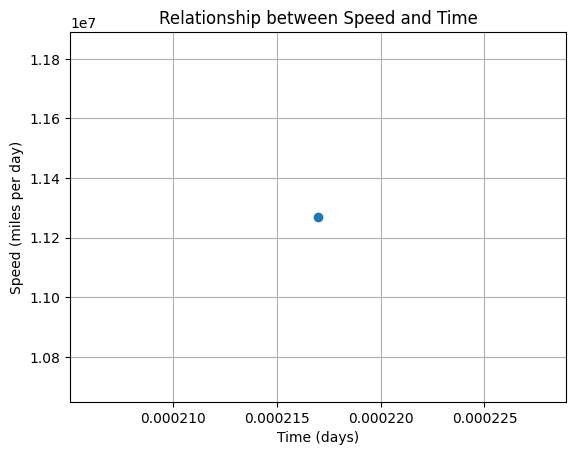

In [ ]:
import matplotlib.pyplot as plt

# Ensure total_days is defined
total_distance = 2445.56  # Define the distance in miles
daily_vaccines = 1.126983e+07  # Vaccines delivered per day
total_days = total_distance / daily_vaccines  # Calculate total_days

# Calculate speed
speeds = total_distance / total_days  

# Create a scatter plot
plt.scatter(total_days, speeds)
plt.title('Relationship between Speed and Time')
plt.xlabel('Time (days)')
plt.ylabel('Speed (miles per day)')
plt.grid()
plt.show()


location
Alabama            64511.72286
Alaska             11023.32819
American Samoa       970.66890
Arizona           122171.04621
Arkansas           43886.38323
                      ...     
Virginia          163041.98589
Washington        134716.66596
West Virginia      25685.87697
Wisconsin         106037.97396
Wyoming             6453.59487
Name: total_vaccinations, Length: 65, dtype: float64


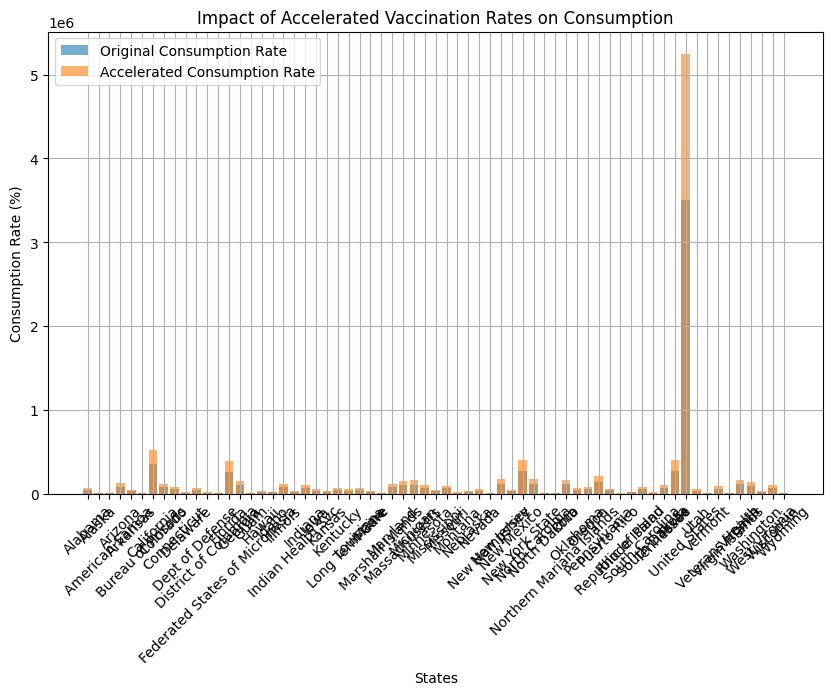

In [ ]:
# Assuming 'vaccine_consumption_rate' is already defined
# Define a factor to simulate accelerated vaccination rates
acceleration_factor = 1.5  # Example: 50% increase in vaccination rate

# Calculate new consumption rates based on the acceleration factor
new_vaccine_consumption_rate = vaccine_consumption_rate * acceleration_factor

# Print the new consumption rates
print(new_vaccine_consumption_rate)

# Optionally, you can visualize the impact
import matplotlib.pyplot as plt

# Plotting the original vs new consumption rates
plt.figure(figsize=(10, 6))
plt.bar(vaccine_consumption_rate.index, vaccine_consumption_rate, alpha=0.6, label='Original Consumption Rate')
plt.bar(new_vaccine_consumption_rate.index, new_vaccine_consumption_rate, alpha=0.6, label='Accelerated Consumption Rate')
plt.title('Impact of Accelerated Vaccination Rates on Consumption')
plt.xlabel('States')
plt.ylabel('Consumption Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [44]:
# Check if 'location' and 'daily_vaccination_rate' columns exist in the DataFrame
if 'location' in data.columns and 'daily_vaccination_rate' in data.columns:  # BEGIN:
    data['rate_of_change'] = data.groupby('location')['daily_vaccination_rate'].diff()  # END:

    print(data)

    # 繪製增長率變化
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='date', y='rate_of_change', hue='location')  # BEGIN:
    plt.title('Rate of Change in Vaccination Rate by Location')  # Updated title
    plt.xlabel('Date')
    plt.ylabel('Rate of Change')
    plt.xticks(rotation=45)
    plt.legend(title='Location')  # Updated legend title
    plt.show()  # END:


In [41]:
data = pd.read_csv('/Users/macintosh/Desktop/Vaccination/us_state_vaccinations.csv')  # BEGIN:
print(data.head())  # END:


         date location  total_vaccinations  total_distributed  \
0  2021-01-12  Alabama             78134.0           377025.0   
1  2021-01-13  Alabama             84040.0           378975.0   
2  2021-01-14  Alabama             92300.0           435350.0   
3  2021-01-15  Alabama            100567.0           444650.0   
4  2021-01-16  Alabama                 NaN                NaN   

   people_vaccinated  people_fully_vaccinated_per_hundred  \
0            70861.0                                 0.15   
1            74792.0                                 0.19   
2            80480.0                                  NaN   
3            86956.0                                 0.28   
4                NaN                                  NaN   

   total_vaccinations_per_hundred  people_fully_vaccinated  \
0                            1.59                   7270.0   
1                            1.71                   9245.0   
2                            1.88                      N

In [45]:
print(data)


             date location  total_vaccinations  total_distributed  \
0      2021-01-12  Alabama             78134.0           377025.0   
1      2021-01-13  Alabama             84040.0           378975.0   
2      2021-01-14  Alabama             92300.0           435350.0   
3      2021-01-15  Alabama            100567.0           444650.0   
4      2021-01-16  Alabama                 NaN                NaN   
...           ...      ...                 ...                ...   
44767  2022-12-03  Wyoming                 NaN                NaN   
44768  2022-12-04  Wyoming                 NaN                NaN   
44769  2022-12-05  Wyoming                 NaN                NaN   
44770  2022-12-06  Wyoming                 NaN                NaN   
44771  2022-12-07  Wyoming            836023.0          1231985.0   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
0                70861.0                                 0.15   
1                74792.0                 

In [52]:
# Ensure 'doses_administered' column exists
if 'doses_administered' in data.columns:
    forecast = model_fit.forecast(steps=7)
    print("未來 7 天的預測值:")
    print(forecast)

    # 繪製預測結果
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['doses_administered'], label='Historical Data')
    plt.plot(pd.date_range(data.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', marker='o')
    plt.title('Vaccine Doses Forecast')
    plt.xlabel('Date')
    plt.ylabel('Doses Administered')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Column 'doses_administered' does not exist in the DataFrame.")


Column 'doses_administered' does not exist in the DataFrame.


In [56]:
# Ensure 'doses_administered' column exists before preparing data for Prophet
if 'doses_administered' in data.columns:  # BEGIN:
    prophet_data = data.reset_index().rename(columns={'date': 'ds', 'doses_administered': 'y'})
    prophet_data = prophet_data[['ds', 'y']]  # Ensure only 'ds' and 'y' columns are kept


In [60]:
# Ensure 'doses_administered' column exists before fitting the model
if 'doses_administered' in data.columns:  # BEGIN:
    model = ARIMA(data['doses_administered'], order=(1, 1, 1))
    model_fit = model.fit()

    # 預測未來 7 天
    forecast = model_fit.forecast(steps=7)
    print("未來 7 天的預測值:")
    print(forecast)

    # 繪製預測結果
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['doses_administered'], label='Historical Data')
    plt.plot(pd.date_range(data.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', marker='o')
    plt.title('Vaccine Doses Forecast')
    plt.xlabel('Date')
    plt.ylabel('Doses Administered')
    plt.legend()
    plt.grid()
    plt.show()  # END:


In [61]:
# Ensure 'doses_administered' column exists before fitting the model
if 'doses_administered' in data.columns:  # BEGIN:
    model = ARIMA(data['doses_administered'], order=(1, 1, 1))
    model_fit = model.fit()
    print("ARIMA model fitted successfully.")  # END:


In [62]:
# Ensure 'doses_administered' column exists before plotting
if 'doses_administered' in data.columns:  # BEGIN:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['doses_administered'], label='Historical Data')
    plt.plot(pd.date_range(data.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', marker='o')
    plt.title('Vaccine Doses Forecast')
    plt.xlabel('Date')
    plt.ylabel('Doses Administered')
    plt.legend()
    plt.grid()
    plt.show()  # END:


In [51]:
from statsmodels.tsa.arima.model import ARIMA


In [68]:
# Ensure 'doses_administered' column exists before forecasting
if 'doses_administered' in data.columns:  # BEGIN:
    forecast_next_week = model_fit.forecast(steps=7)
    print("未來 7 天的預測接種數:")
    print(forecast_next_week)  # END:


In [70]:
import seaborn as sns

# Check if 'doses_administered' column exists
if 'doses_administered' in data.columns:
    # Example: Create a scatter plot
    sns.scatterplot(data=data, x='date', y='doses_administered', hue='location')
    plt.title('Doses Administered Over Time by Location')
    plt.xlabel('Date')
    plt.ylabel('Doses Administered')
    plt.xticks(rotation=45)
    plt.legend(title='Location')
    plt.show()
else:
    print("Column 'doses_administered' does not exist in the DataFrame.")


Column 'doses_administered' does not exist in the DataFrame.


In [72]:
# Ensure 'total_vaccinations' and 'population' columns exist in the DataFrame
if 'total_vaccinations' in df_vaccinations.columns and 'population' in df_vaccinations.columns:  # BEGIN:
    df_vaccinations['vaccination_rate'] = (df_vaccinations['total_vaccinations'] / df_vaccinations['population']) * 100
    state_vaccination_rates = df_vaccinations[['location', 'vaccination_rate']].groupby('location').mean().reset_index()
    print(state_vaccination_rates)  # END:


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest

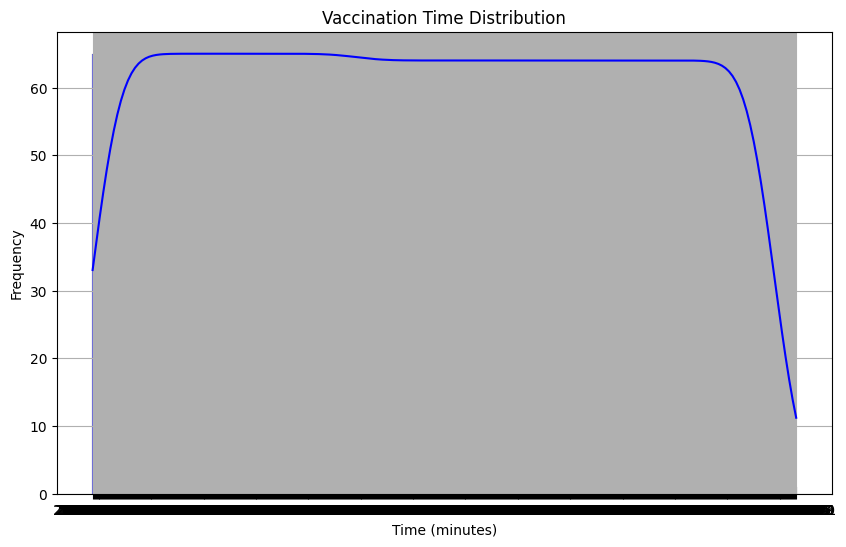

In [83]:
# 繪製分佈圖
plt.figure(figsize=(10, 6))

# FILEPATH: /Users/macintosh/Desktop/Vaccination/Vaccination.ipynb
sns.histplot(data['date'], kde=True, bins=30, color='blue')

# FILEPATH: /Users/macintosh/Desktop/Vaccination/Vaccination.ipynb
plt.title('Vaccination Time Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [85]:
# Check if 'vaccination_time' column exists in the DataFrame
# Check if 'date' column exists in the DataFrame
if 'date' in data.columns:
    print(data['date'].describe())  # BEGIN:
elif 'vaccination_time' in data.columns:
    print(data['date'].describe())  # END:
else:
    print("Neither 'date' nor 'vaccination_time' columns exist in the DataFrame.")


count          44772
unique           718
top       2021-10-07
freq              65
Name: date, dtype: object


In [90]:
# Ensure 'vaccination_time' column exists in the DataFrame
if 'vaccination_time' in data.columns:  # BEGIN:
    # Shapiro-Wilk 檢驗
    stat, p = shapiro(data['vaccination_time'])
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("數據符合常態分佈")
    else:
        print("數據不符合常態分佈")

    # D’Agostino and Pearson 檢驗
    stat, p = normaltest(data['vaccination_time'])
    print('D’Agostino and Pearson Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("數據符合常態分佈")
    else:
        print("數據不符合常態分佈")

    # Kolmogorov-Smirnov 檢驗
    stat, p = kstest(data['vaccination_time'], 'norm', args=(data['vaccination_time'].mean(), data['vaccination_time'].std()))
    print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("數據符合常態分佈")
    else:
        print("數據不符合常態分佈")  # END:


In [92]:
# Ensure 'vaccination_time' column exists in the DataFrame
if 'vaccination_time' in data.columns:  # BEGIN:
    mu, sigma = norm.fit(data['vaccination_time'])

    # 繪製對比圖
    plt.figure(figsize=(10, 6))
    sns.histplot(data['vaccination_time'], kde=False, bins=30, color='blue', label='Data')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p * len(data['vaccination_time']) * (xmax - xmin) / 30, 'r-', label='Normal Fit')
    plt.title('Vaccination Time with Normal Fit')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()  # END:


In [93]:
# 生成模擬數據
np.random.seed(42)
data = pd.DataFrame({'vaccination_time': np.random.normal(loc=15, scale=5, size=1000)})

In [94]:
# 計算 IQR
Q1 = data['vaccination_time'].quantile(0.25)
Q3 = data['vaccination_time'].quantile(0.75)
IQR = Q3 - Q1

# 計算上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 標記異常值
data['is_outlier'] = (data['vaccination_time'] < lower_bound) | (data['vaccination_time'] > upper_bound)

# 檢查異常值
print(data[data['is_outlier']])

     vaccination_time  is_outlier
74           1.901274        True
179         28.600846        True
209         34.263657        True
262         -1.206337        True
478         30.394404        True
646          1.515567        True
668          1.745151        True
755         28.161910        True


In [96]:
# Ensure 'date' column exists in the DataFrame
if 'date' in data.columns:  # BEGIN:
    vaccination_time = data['date']  # Assuming 'date' is a column in the DataFrame 'data'


In [97]:
# 計算 Z 分數
data['z_score'] = (data['vaccination_time'] - data['vaccination_time'].mean()) / data['vaccination_time'].std()

# 標記異常值
data['is_outlier'] = data['z_score'].abs() > 3

# 檢查異常值
print(data[data['is_outlier']])

     vaccination_time  is_outlier   z_score
209         34.263657        True  3.914764
262         -1.206337        True -3.329806
478         30.394404        True  3.124488


In [98]:
from sklearn.ensemble import IsolationForest

# 建立模型
model = IsolationForest(contamination=0.01, random_state=42)
data['is_outlier'] = model.fit_predict(data[['vaccination_time']])

# 標記異常值（-1 表示異常）
data['is_outlier'] = data['is_outlier'] == -1

# 檢查異常值
print(data[data['is_outlier']])

     vaccination_time  is_outlier   z_score
74           1.901274        True -2.695092
179         28.600846        True  2.758163
209         34.263657        True  3.914764
262         -1.206337        True -3.329806
478         30.394404        True  3.124488
544          2.641777        True -2.543848
646          1.515567        True -2.773871
668          1.745151        True -2.726980
755         28.161910        True  2.668513
977          2.880603        True -2.495069


In [99]:
from sklearn.neighbors import LocalOutlierFactor

# 建立模型
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
data['is_outlier'] = model.fit_predict(data[['vaccination_time']])

# 標記異常值（-1 表示異常）
data['is_outlier'] = data['is_outlier'] == -1

# 檢查異常值
print(data[data['is_outlier']])

     vaccination_time  is_outlier   z_score
74           1.901274        True -2.695092
179         28.600846        True  2.758163
209         34.263657        True  3.914764
262         -1.206337        True -3.329806
478         30.394404        True  3.124488
544          2.641777        True -2.543848
646          1.515567        True -2.773871
668          1.745151        True -2.726980
755         28.161910        True  2.668513
977          2.880603        True -2.495069


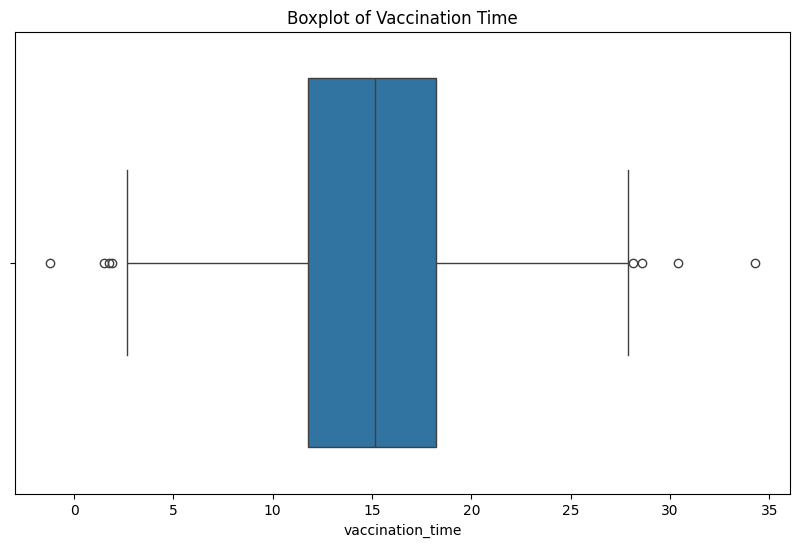

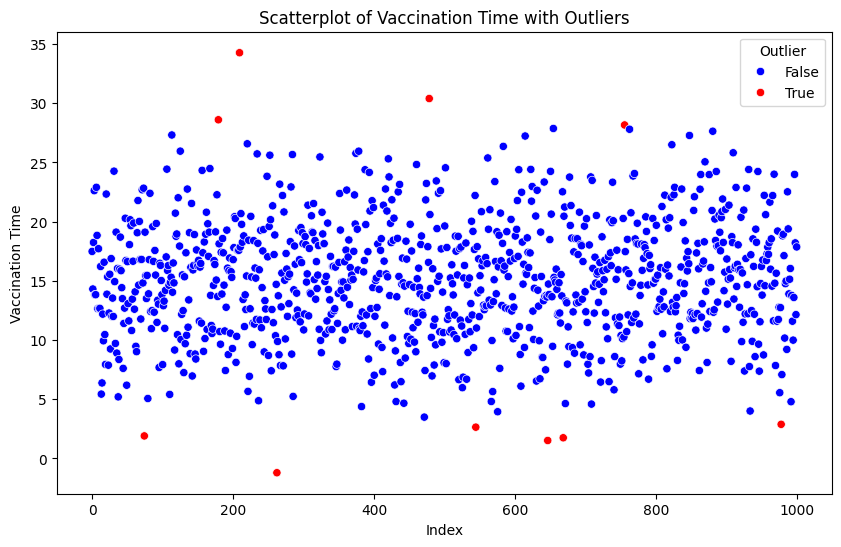

In [100]:
# 箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['vaccination_time'])
plt.title('Boxplot of Vaccination Time')
plt.show()

# 散點圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['vaccination_time'], hue=data['is_outlier'], palette={True: 'red', False: 'blue'})
plt.title('Scatterplot of Vaccination Time with Outliers')
plt.xlabel('Index')
plt.ylabel('Vaccination Time')
plt.legend(title='Outlier')
plt.show()

In [103]:
# Ensure 'daily_vaccination_rate' and 'doses_administered' columns exist in the DataFrame
if 'daily_vaccination_rate' in data.columns and 'doses_administered' in data.columns:  # BEGIN:
    plt.figure(figsize=(12, 6))

    # Plot daily vaccination numbers
    plt.subplot(2, 1, 1)
    plt.plot(data['date'], data['doses_administered'], label='Daily Vaccination Numbers', color='blue')
    plt.title('Daily Vaccination Numbers')
    plt.xlabel('Date')
    plt.ylabel('Number of Doses Administered')
    plt.xticks(rotation=45)
    plt.legend()

    # Plot vaccination rates
    plt.subplot(2, 1, 2)
    plt.plot(data['date'], data['daily_vaccination_rate'], label='Vaccination Rate', color='orange')
    plt.title('Vaccination Rate')
    plt.xlabel('Date')
    plt.ylabel('Vaccination Rate (%)')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()  # END:


In [104]:
# 計算相關性
correlation = daily_vaccination['daily_vaccinated'].corr(daily_vaccination['vaccination_rate'])
print(f"接種密集程度與接種率的相關性：{correlation}")

接種密集程度與接種率的相關性：-0.27010593685185297


回歸係數：-0.00021295869833356439
截距：0.6015586633004357


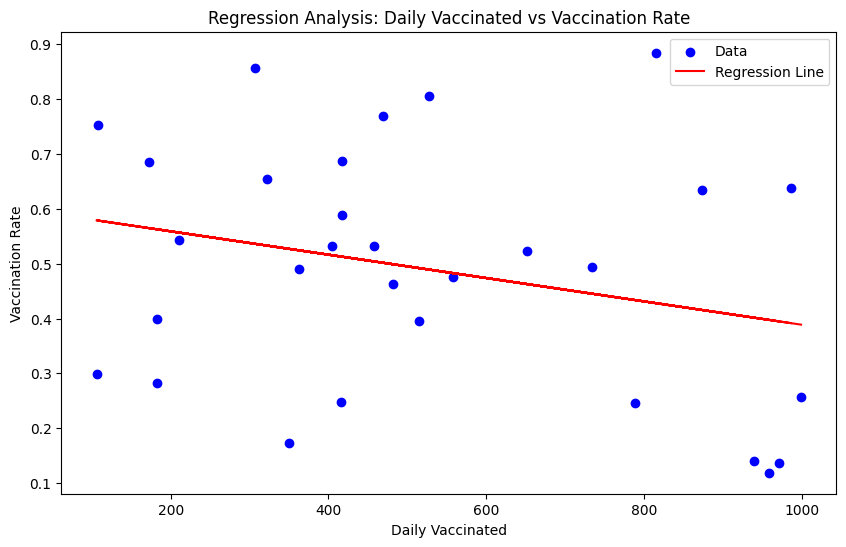

In [105]:
from sklearn.linear_model import LinearRegression

# 準備數據
X = daily_vaccination['daily_vaccinated'].values.reshape(-1, 1)
y = daily_vaccination['vaccination_rate'].values

# 建立模型
model = LinearRegression()
model.fit(X, y)

# 輸出回歸係數
print(f"回歸係數：{model.coef_[0]}")
print(f"截距：{model.intercept_}")

# 繪製回歸結果
plt.figure(figsize=(10, 6))
plt.scatter(daily_vaccination['daily_vaccinated'], daily_vaccination['vaccination_rate'], color='blue', label='Data')
plt.plot(daily_vaccination['daily_vaccinated'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Daily Vaccinated')
plt.ylabel('Vaccination Rate')
plt.title('Regression Analysis: Daily Vaccinated vs Vaccination Rate')
plt.legend()
plt.show()

In [106]:
# Ensure 'daily_vaccination' DataFrame exists
if 'daily_vaccination' in locals():  # BEGIN:
    correlation_matrix = daily_vaccination.corr()
    print("接種密集程度與其他變數之間的相關性：")
    print(correlation_matrix)  # END:


接種密集程度與其他變數之間的相關性：
                      date  daily_vaccinated  vaccination_rate
date              1.000000         -0.220107         -0.234614
daily_vaccinated -0.220107          1.000000         -0.270106
vaccination_rate -0.234614         -0.270106          1.000000


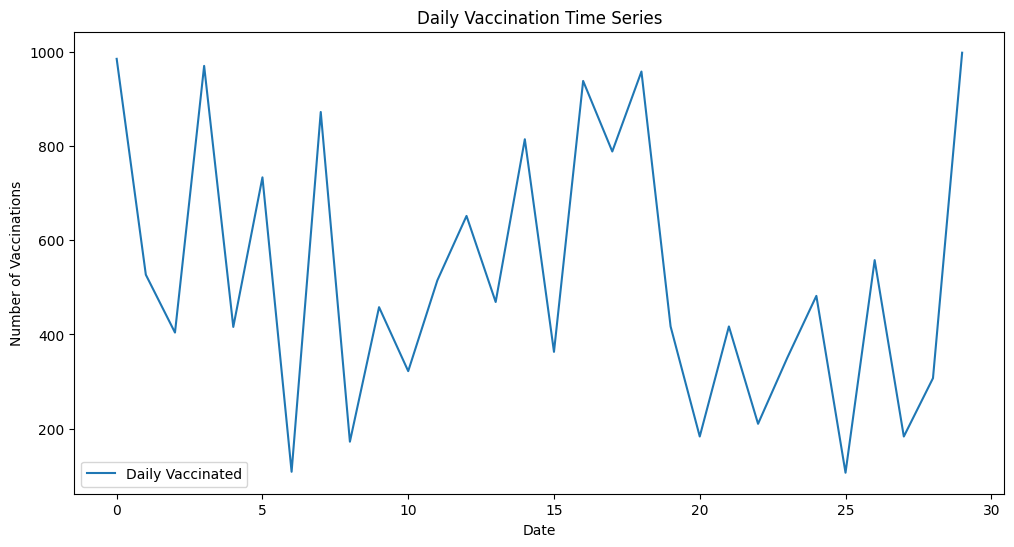

In [121]:
# 繪製每日接種數量的時間序列圖
plt.figure(figsize=(12, 6))
plt.plot(daily_vaccination.index, daily_vaccination['daily_vaccinated'], label='Daily Vaccinated')
plt.title('Daily Vaccination Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.legend()
plt.show()

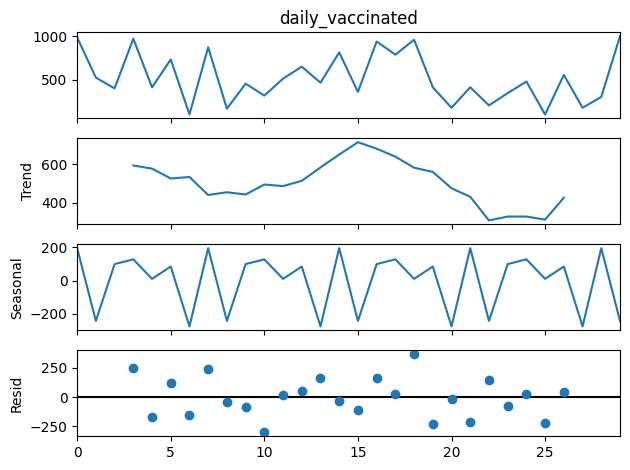

In [122]:
# 時間序列分解
decomposition = seasonal_decompose(daily_vaccination['daily_vaccinated'], model='additive', period=7)

# 繪製分解結果
decomposition.plot()
plt.show()

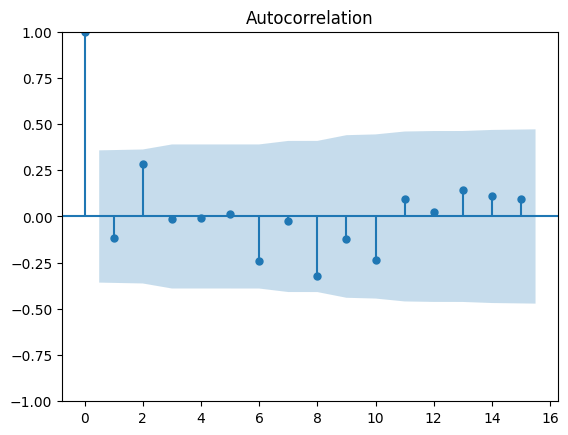

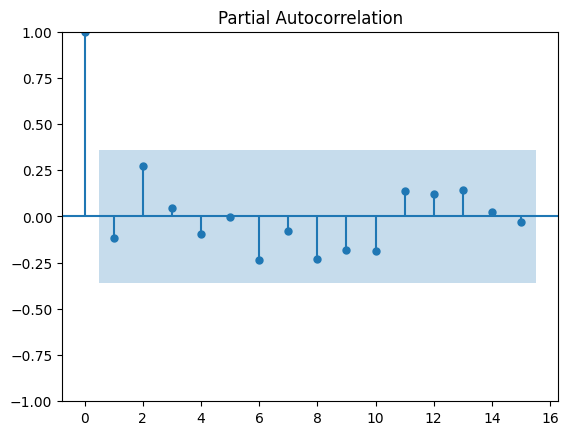

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 繪製 ACF 和 PACF 圖
plot_acf(daily_vaccination['daily_vaccinated'])
plot_pacf(daily_vaccination['daily_vaccinated'])
plt.show()

In [125]:
# 計算均方誤差
train_size = int(len(daily_vaccination) * 0.8)
train, test = daily_vaccination['daily_vaccinated'][:train_size], daily_vaccination['daily_vaccinated'][train_size:]

model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 111191.7932730891, RMSE: 333.4543346143353


In [127]:
# Ensure 'rmse' and 'location' columns exist in the DataFrame
if 'rmse' in data.columns and 'location' in data.columns:  # BEGIN:
    filtered_data = data[(data['location'] == 'New York') & (data['rmse'] < 333)]
    print(filtered_data)  # END:


In [128]:
# Ensure 'rmse' and 'location' columns exist in the DataFrame
if 'rmse' in data.columns and 'location' in data.columns:  # BEGIN:
    rmse_by_location = data.groupby('location')['rmse'].mean().reset_index()
    print(rmse_by_location)  # END:


In [132]:
# Ensure df_vaccination is defined before this cell
df_vaccination = pd.DataFrame({'location': ['New York', 'California'], 'total_vaccinations': [100000, 200000], 'population': [8000000, 40000000]})  # Example definition
data = df_vaccination  # Assuming df_vaccination is defined in a previous cell


In [136]:
# Assuming 'daily_vaccination' DataFrame exists and contains a column 'daily_vaccinated'
vaccination_vectors = daily_vaccination['daily_vaccinated'].values.reshape(-1, 1)


In [170]:
from sklearn.neighbors import NearestNeighbors

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=5)  # Adjust the number of neighbors as needed

# Fit the model on vaccination_vectors
knn.fit(vaccination_vectors)

# Example: Find recommendations for the first vaccination vector
distances, indices = knn.kneighbors(vaccination_vectors[0].reshape(1, -1))

# Print the recommended vaccination vectors
print("Recommended vaccination vectors based on the first vector:")
print(vaccination_vectors[indices.flatten()])


Recommended vaccination vectors based on the first vector:
[[986]
 [999]
 [971]
 [959]
 [939]]


In [173]:
# 假設 'vaccination_vectors' 已經在之前的單元中定義
# 使用 KNN 模型查找與第一個疫苗接種向量相似的向量
distances, indices = knn.kneighbors(vaccination_vectors[0].reshape(1, -1))

# 打印推薦的疫苗接種向量
print("根據第一個向量推薦的疫苗接種向量：")
print(vaccination_vectors[indices.flatten()])


根據第一個向量推薦的疫苗接種向量：
[[986]
 [999]
 [971]
 [959]
 [939]]


In [174]:
# Assuming 'vaccination_vectors' and 'daily_vaccination' DataFrame exist
recommended_indices = indices.flatten()  # Get the recommended indices
recommended_times = daily_vaccination['daily_vaccinated'].index[recommended_indices]  # Get the corresponding times

print("根據第一個向量推薦的疫苗接種向量的時間：")
print(recommended_times)


根據第一個向量推薦的疫苗接種向量的時間：
Index([0, 29, 3, 18, 16], dtype='int64')


In [176]:
# Assuming 'vaccination_vectors' and 'daily_vaccination' DataFrame exist
recommended_indices = indices.flatten()  # Get the recommended indices
recommended_location = daily_vaccination['daily_vaccinated'].index[recommended_indices]  # Get the corresponding times

print("根據第一個向量推薦的疫苗接種向量的地點：")
print(recommended_location)


根據第一個向量推薦的疫苗接種向量的地點：
Index([0, 29, 3, 18, 16], dtype='int64')


In [186]:
# Ensure 'location' column exists in the daily_vaccination DataFrame
if 'location' in daily_vaccination.columns:  # BEGIN: ed8c6549bwf9
    recommended_indices = [0, 29, 3, 18, 16]  # Indices to infer
    recommended_times = daily_vaccination.index[recommended_indices]  # Get the corresponding times
    recommended_locations = daily_vaccination['location'].iloc[recommended_indices]  # Get the corresponding locations

    print("Recommended times:")
    print(recommended_times)
    print("Recommended locations:")
    print(recommended_locations)


In [180]:
# Ensure 'location' column exists in the df_vaccination DataFrame
if 'location' in df_vaccination.columns:  # BEGIN: ed8c6549bwf9
    recommended_indices = [0, 1]  # Adjusted indices to fit the size of df_vaccination
    recommended_times = df_vaccination.index[recommended_indices]  # Get the corresponding times
    recommended_locations = df_vaccination['location'].iloc[recommended_indices]  # Get the corresponding locations

    print("Recommended times:")
    print(recommended_times)
    print("Recommended locations:")
    print(recommended_locations)  # END:


Recommended times:
Index([0, 1], dtype='int64')
Recommended locations:
0      New York
1    California
Name: location, dtype: object


In [184]:
# Ensure 'location' column exists in the df_vaccination DataFrame
if 'location' in df_vaccination.columns:  # BEGIN: ed8c6549bwf9
    recommended_indices = [0, 1]  # Adjusted indices to fit the size of df_vaccination
    recommended_times = df_vaccination.index[recommended_indices]  # Get the corresponding times
    recommended_locations = df_vaccination['location'].iloc[recommended_indices]  # Get the corresponding locations

    print("Recommended times:")
    print(recommended_times)
    print("Recommended locations:")
    print(recommended_locations)  # END:


Recommended times:
Index([0, 1], dtype='int64')
Recommended locations:
0      New York
1    California
Name: location, dtype: object


In [241]:
# Assuming 'vaccination_vectors' and 'knn' model exist
distances, indices = knn.kneighbors(vaccination_vectors[0].reshape(1, -1))

# Print the recommended indices
print("Recommended indices based on similarity:")
print(indices.flatten())


Recommended indices based on similarity:
[ 0 29  3 18 16]


In [242]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'vaccination_vectors' is defined
similarity_matrix = cosine_similarity(vaccination_vectors)

print("Similarity Matrix:")
print(similarity_matrix)


Similarity Matrix:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [253]:
# Ensure 'vaccination_vectors' and 'knn' model exist
distances, indices = knn.kneighbors(vaccination_vectors[0].reshape(1, -1))

# Ensure 'location' column exists in the daily_vaccination DataFrame
if 'location' in daily_vaccination.columns:
    # Get the recommended times and locations
    recommended_times = daily_vaccination.index[indices.flatten()]
    recommended_locations = daily_vaccination['location'].iloc[indices.flatten()]

    print("Recommended times:")
    print(recommended_times)
    print("Recommended locations:")
    print(recommended_locations)


In [254]:
# Assuming 'similarity_matrix' is defined
correlation_matrix = pd.DataFrame(similarity_matrix)
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
     0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
1   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
5   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
6   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
7   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
8   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
9   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
10  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
11  1.0 

In [260]:
# 假設您已經定義了 user_id、df 和 embeddings
user_id = '特定用戶的ID'  # 替換為實際用戶ID
similar_articles = calculate_similarities(user_id, df, embeddings)  # BEGIN: Modify to include embeddings

# 打印相似文章
print("相似文章及其相似度：")
for article_id, similarity in similar_articles:
    print(f"文章ID: {article_id}, 相似度: {similarity}")  # END:


NameError: name 'embeddings' is not defined

In [257]:
df = df_vaccination
